# Сипаков Вячеслав Всеволодович 19-ИВТ-3 Вариант 22

#### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats

In [2]:
df = pd.read_csv('airfoil_self_noise.dat.txt', sep = '\s+', names = ['frequency', 'angle', 'chord', 'velocity', 'thickness', 'noise'])
df

,frequency,angle,chord,velocity,thickness,noise
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   frequency  1503 non-null   int64  
 1   angle      1503 non-null   float64
 2   chord      1503 non-null   float64
 3   velocity   1503 non-null   float64
 4   thickness  1503 non-null   float64
 5   noise      1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


| Переменная | Описание | Тип значения |
| --- | --- | --- |
|frequency| частота| число (в Гц)
angle     |  угол атаки| число (в градусах)
chord     | длина шнура| число (в метрах)
velocity  | скорость потока| число (в м/c)
thickness | толщина вытеснения на стороне всасывания| число (в м/c)
noise     | уровень шума| число (в дБ)

Нам нужно на основе других параметров определить параметр "**noise**" (уровень шума)

#### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [4]:
df.shape


(1503, 6)

In [5]:
df.drop_duplicates()
df.shape

(1503, 6)

#### 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

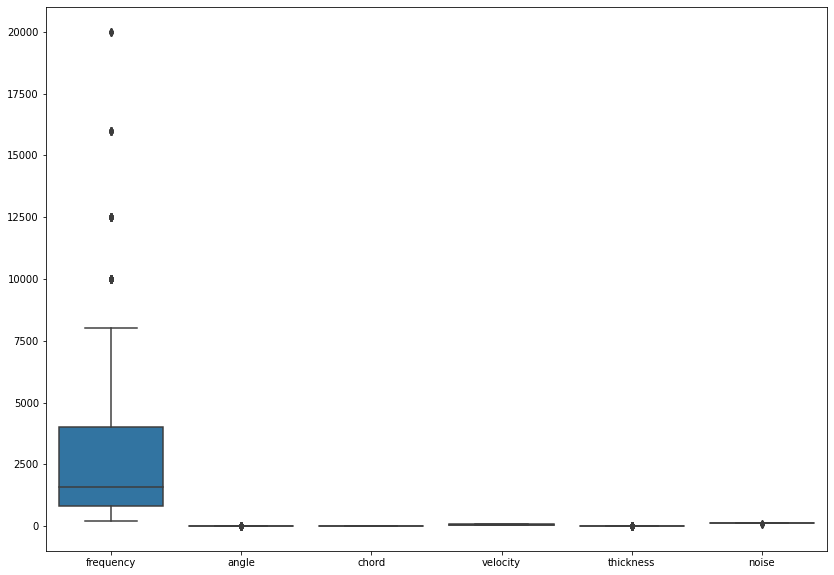

In [6]:
plt.figure(figsize = (14, 10))
sns.boxplot(data = df)
plt.show()

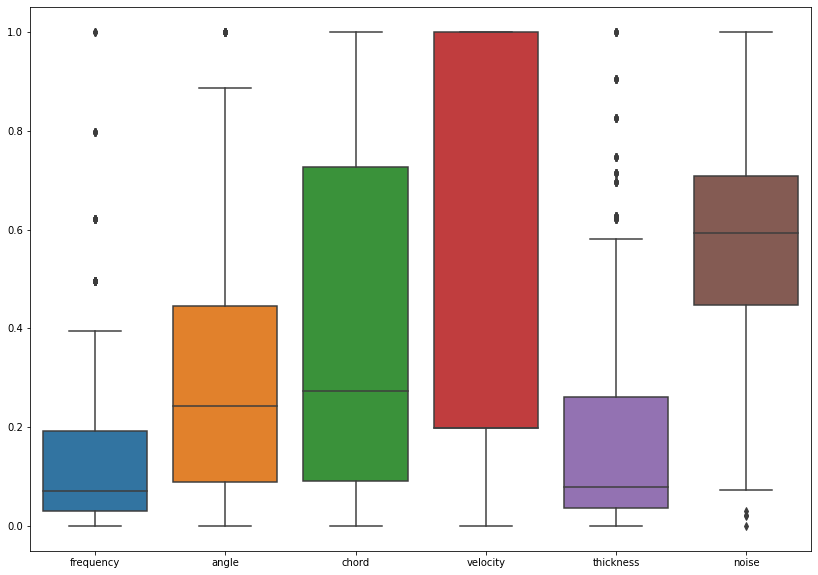

In [7]:
#df['age'] = df['age'].fillna(df['age'].median()) # заполним пропущенные значения параметра age медианными

df = df.dropna().reset_index(drop = True)

scaler = MinMaxScaler() # нормализация

column_names = ['frequency', 'angle', 'chord', 'velocity', 'thickness', 'noise']
df = pd.DataFrame(scaler.fit_transform(df), columns = column_names)

plt.figure(figsize = (14, 10))
sns.boxplot(data = df)
plt.show()

#### 4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены
Категориальные признаки отсутствуют

#### 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

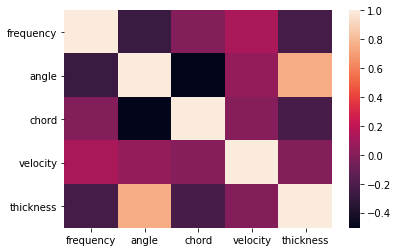

In [8]:
df_corr = df.drop('noise', axis = 1).corr()
sns.heatmap(df_corr)
plt.show()

Параметр *angle* коррелирует отрицательно с параметром *chord* и положительно с параметром *thickness*, поэтому удалим его.

In [9]:
df = df.drop('angle', axis = 1)
df

,frequency,chord,velocity,thickness,noise
0,0.030303,1.000000,1.000000,0.039005,0.606829
1,0.040404,1.000000,1.000000,0.039005,0.580238
2,0.053030,1.000000,1.000000,0.039005,0.600181
3,0.070707,1.000000,1.000000,0.039005,0.643790
4,0.090909,1.000000,1.000000,0.039005,0.640333
...,...,...,...,...,...
1498,0.116162,0.272727,0.199495,0.904111,0.183051
1499,0.148990,0.272727,0.199495,0.904111,0.156194
1500,0.191919,0.272727,0.199495,0.904111,0.085729
1501,0.242424,0.272727,0.199495,0.904111,0.075624


#### 6. Заполните пропущенные значения в данных

In [10]:
df = df.fillna(0)
df

,frequency,chord,velocity,thickness,noise
0,0.030303,1.000000,1.000000,0.039005,0.606829
1,0.040404,1.000000,1.000000,0.039005,0.580238
2,0.053030,1.000000,1.000000,0.039005,0.600181
3,0.070707,1.000000,1.000000,0.039005,0.643790
4,0.090909,1.000000,1.000000,0.039005,0.640333
...,...,...,...,...,...
1498,0.116162,0.272727,0.199495,0.904111,0.183051
1499,0.148990,0.272727,0.199495,0.904111,0.156194
1500,0.191919,0.272727,0.199495,0.904111,0.085729
1501,0.242424,0.272727,0.199495,0.904111,0.075624


#### 7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.
* линейная регрессия, LASSO регуляризатор

In [11]:
x, y = df.drop(['noise'], axis = 1), df['noise']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 666)

lasso = Lasso()

params = {'alpha': np.arange(0.005, 5, 0.05)}
lasso_grid = GridSearchCV(lasso, params)
lasso_grid.fit(x_train, y_train)
best_alpha = lasso_grid.best_estimator_.alpha
print('Best alpha:', best_alpha)

Best alpha: 0.005


In [12]:
lasso = Lasso(alpha = best_alpha)
lasso.fit(x_train, y_train)
lasso_predict = lasso.predict(x_test)

pearson_corr, pearson_pvalue = pearsonr(lasso_predict, y_test)
print('Pearson correlation:\t', pearson_corr)
print('p-value:\t\t', pearson_pvalue)

spearman_corr, spearman_pvalue = spearmanr(lasso_predict, y_test)
print('\nSpearman correlation:\t', spearman_corr)
print('p_value:\t\t', spearman_pvalue)

mean = np.mean(y_test[:] - lasso_predict[:])
print('\nLasso predict error:\n', mean)

Pearson correlation:	 0.6354826558307112
p-value:		 2.189327282405986e-52

Spearman correlation:	 0.5947885314937267
p_value:		 1.701632341018516e-44

Lasso predict error:
 0.014640273780663404


* линейная регрессия, RIDGE регуляризатор

In [13]:
ridge = Ridge()
params = {'alpha': np.arange(-6, 5, 0.05)}
ridge_grid = GridSearchCV(ridge, params)
ridge_grid.fit(x_train, y_train)
best_alpha = ridge_grid.best_estimator_.alpha
print('Best alpha:', best_alpha)

Best alpha: 0.09999999999997833


In [14]:
ridge = Ridge(alpha = best_alpha)
ridge.fit(x_train, y_train)
ridge_predict = ridge.predict(x_test)
pearson_corr, pearson_pvalue = pearsonr(ridge_predict, y_test)
print('Pearson correlation:\t', pearson_corr)
print('p-value:\t\t', pearson_pvalue)

spearman_corr, spearman_pvalue = spearmanr(ridge_predict, y_test)
print('\nSpearman correlation:\t', spearman_corr)
print('p_value:\t\t', spearman_pvalue)

mean = np.mean(y_test[:] - ridge_predict[:])
print('\nRidge predict error:\n', mean)

Pearson correlation:	 0.6323542837794667
p-value:		 9.748643534026995e-52

Spearman correlation:	 0.5917937436424651
p_value:		 5.857388658557746e-44

Ridge predict error:
 0.008306112034944503
